<a href="https://colab.research.google.com/github/rucelfernandez/LinearAlgebra1T-2021-2022/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Linear Algebra for ECE**


##**Laboratory 4: Matrices**

Now that we havee a fundamental knowledge about Python, we'll try to look into greater dimensions.

##**Objectives**

At the end of this activity you will be able to:

1. Be familiar with matrices and their relation to linear equations.
2. Perform basic matrix operations.
3. Program and translate matrix equations and operations using Python.

###**Discussion**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
%matplotlib inline

###**Matrices**

The notation and use of matrices is probably one of the fundamentals of modern computing. Matrices are also handy representations of complex equations or multiple inter-related equations from 2-dimensional equations to even hundreds and thousands of them.

Let's say for example you have $A$ and $B$ as system of equation.

$$
A = \left\{
    \begin{array}\
        x + y \\ 
        4x - 10y
    \end{array}
\right. \\
B = \left\{
    \begin{array}\
        x+y+z \\
        3x -2y -z \\
        -x + 4y +2z
    \end{array}
\right. $$

We could see that $A$ is a system of 2 equations with 2 parameters. While $B$ is a system of 3 equations with 3 parameters. We can represent them as matrices as:

$$
A=\begin{bmatrix} 1 & 1 \\ 4 & {-10}\end{bmatrix} \\
B=\begin{bmatrix} 1 & 1 & 1 \\ 3 & -2 & -1 \\ -1 & 4 & 2\end{bmatrix}
$$

So assuming that you already discussed the fundamental representation of matrices, their types, and operations. We'll proceed in doing them in here in Python.

###**Declaring Matrices**

Just like our previous laboratory activity, we'll represent system of linear equations as a matrix. The entities or numbers in matrices are called the elements of a matrix. These elements are arranged and ordered in rows and columns which form the list/array-like structure of matrices. And just like arrays, these elements are indexed according to their position with respect to their rows and columns. This can be reprsented just like the equation below. Whereas $A$ is a matrix consisting of elements denoted by $a_{i,j}$. Denoted by $i$ is the number of rows in the matrix while $j$ stands for the number of columns.
Do note that the $size$ of a matrix is $i\times j$.

$$A=\begin{bmatrix}
a_{(0,0)}&a_{(0,1)}&\dots&a_{(0,j-1)}\\
a_{(1,0)}&a_{(1,1)}&\dots&a_{(1,j-1)}\\
\vdots&\vdots&\ddots&\vdots&\\
a_{(i-1,0)}&a_{(i-1,1)}&\dots&a_{(i-1,j-1)}
\end{bmatrix}
$$

We already gone over some of the types of matrices as vectors but we'll further discuss them in this laboratory activity. Since you already know how to describe vectors using shape, dimensions and size attributes, we'll use them to analyze these matrices.

In [2]:
## Since we'll keep on describing matrices. Let's make a function.
def describe_mat(matrix):
    print(f'Matrix:\n{matrix}\n\nShape:\t{matrix.shape}\nRank:\t{matrix.ndim}\n')

In [3]:
## Declaring a 2 x 2 matrix
A = np.array([
    [1, 2],
    [3, 1]
])
describe_mat(A)

Matrix:
[[1 2]
 [3 1]]

Shape:	(2, 2)
Rank:	2



In [4]:
G = np.array([
    [1,1],
    [2,2]
])
describe_mat(G)

Matrix:
[[1 1]
 [2 2]]

Shape:	(2, 2)
Rank:	2



In [5]:
## Declaring a 3 x 2 matrix
B = np.array([
    [8, 2],
    [5, 4],
    [1, 1]
])
describe_mat(B)

Matrix:
[[8 2]
 [5 4]
 [1 1]]

Shape:	(3, 2)
Rank:	2



In [6]:
H = np.array([1,2,3,4,5])
describe_mat(H)


Matrix:
[1 2 3 4 5]

Shape:	(5,)
Rank:	1



###**Categorizing Matrices**

There are several ways of classifying matrices. Once could be according to their shape and another is according to their element values. We'll try to go through them.

####**According to Shape**

#####**Row and Column Matrices**

Row and Column matrices are common in vector and matrix computations. They can also represent row and column spaces of a bigger vector space. Row and column matrices are represented by a single column or single row. So with that being, the shape of row matrices would be $1 \times j$ and column matrices would be $i \times 1$.

In [7]:
## Declaring a Rox matrix

row_mat_1D = np.array([
    1, 3, 2
]) ## this is a 1-D Matrix with a shape of (3,), it's not really considered as a row matrix.
row_mat_2D = np.array([
    [1,2,3]                
]) ## this is a 2-D Matrix with a shape of (1,3)
describe_mat(row_mat_1D)
describe_mat(row_mat_2D)

Matrix:
[1 3 2]

Shape:	(3,)
Rank:	1

Matrix:
[[1 2 3]]

Shape:	(1, 3)
Rank:	2



In [8]:
## Declaring a Column Matrix

col_mat = np.array([
    [1],
    [2],
    [5]
]) ## this is a 2-D Matrix with a shape of (3,1)
describe_mat(col_mat)

Matrix:
[[1]
 [2]
 [5]]

Shape:	(3, 1)
Rank:	2



#####**Square Matrices**

Square matrices are matrices that have the same row and column sizes. We could say a matrix is square if $i = j$. We can tweak our matrix descriptor function to determine square matrices.

In [9]:
def describe_mat(matrix):
    is_square = True if matrix.shape[0] == matrix.shape[1] else False 
    print(f'Matrix:\n{matrix}\n\nShape:\t{matrix.shape}\nRank:\t{matrix.ndim}\nIs Square: {is_square}\n')

In [10]:
square_mat = np.array([
    [1,2,5],
    [3,3,8],
    [6,1,2]
])

non_square_mat = np.array([
    [1,2,5],
    [3,3,8]
])
describe_mat(square_mat)
describe_mat(non_square_mat)

Matrix:
[[1 2 5]
 [3 3 8]
 [6 1 2]]

Shape:	(3, 3)
Rank:	2
Is Square: True

Matrix:
[[1 2 5]
 [3 3 8]]

Shape:	(2, 3)
Rank:	2
Is Square: False



####**According to Element Values**


#####**Null Matrix**

A Null Matrix is a matrix that has no elements. It is always a subspace of any vector or matrix.

In [11]:
def describe_mat(matrix):
    if matrix.size > 0:
        is_square = True if matrix.shape[0] == matrix.shape[1] else False 
        print(f'Matrix:\n{matrix}\n\nShape:\t{matrix.shape}\nRank:\t{matrix.ndim}\nIs Square: {is_square}\n')
    else:
        print('Matrix is Null')

In [12]:
null_mat = np.array([])
describe_mat(null_mat)

Matrix is Null


#####**Zero Matrix**

A zero matrix can be any rectangular matrix but with all elemments having a value of 0.

In [13]:
zero_mat_row = np.zeros((1,2))
zero_mat_sqr = np.zeros((2,2))
zero_mat_rct = np.zeros((3,2))

print(f'Zero Row Matrix: \n{zero_mat_row}')
print(f'Zero Square Matrix: \n{zero_mat_sqr}')
print(f'Zero Rectangular Matrix: \n{zero_mat_rct}')

Zero Row Matrix: 
[[0. 0.]]
Zero Square Matrix: 
[[0. 0.]
 [0. 0.]]
Zero Rectangular Matrix: 
[[0. 0.]
 [0. 0.]
 [0. 0.]]


#####**Ones Matrix**

A ones matrix, just like the zero matrix, can be any rectangular matrix but all of its elements are 1s instead of 0s.

In [14]:
ones_mat_row = np.ones((1,2))
ones_mat_sqr = np.ones((2,2))
ones_mat_rct = np.ones((3,2))

print(f'Ones Row Matrix: \n{ones_mat_row}')
print(f'Ones Square Matrix: \n{ones_mat_sqr}')
print(f'Ones Rectangular Matrix: \n{ones_mat_rct}')

Ones Row Matrix: 
[[1. 1.]]
Ones Square Matrix: 
[[1. 1.]
 [1. 1.]]
Ones Rectangular Matrix: 
[[1. 1.]
 [1. 1.]
 [1. 1.]]


#####**Diagonal Matrix**
A diagonal matrix is a square matrix that has values only at the diagonal of the matrix.

In [15]:
np.array([
    [2,0,0],
    [0,3,0],
    [0,0,5]
])
# a[1,1], a[2,2], a[3,3], ... a[n-1,n-1]

array([[2, 0, 0],
       [0, 3, 0],
       [0, 0, 5]])

#####**Identity Matrix**

An identity matrix is a special diagonal matrix in which the values at the diagonal are ones.

In [16]:
np.eye(5)


array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [17]:
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

#####**Upper Triangular Matrix**

An upper triangular matrix is a matrix that has no values below the diagonal.

In [18]:
np.array([
    [1,2,3],
    [0,3,1],
    [0,0,5]
])

array([[1, 2, 3],
       [0, 3, 1],
       [0, 0, 5]])

#####**Lower Triangular Matrix**

A lower triangular matrix is a matrix that has no values above the diagonal.

In [19]:
np.array([
    [1,0,0],
    [5,3,0],
    [7,8,5]
])

array([[1, 0, 0],
       [5, 3, 0],
       [7, 8, 5]])

###**Practice**

1. Given the linear combination below, try to create a corresponding matrix representing it.

$$θ = 5x + 3y - z$$

$$
θ=\begin{bmatrix} 5 & 3 & -1\end{bmatrix}
$$

2. Given the system of linear combinations below, try to encode it as a matrix. Also describe the matrix.

$$ A = \left\{\begin{array} 5x_1 + 2x_2 +x_3\\ 4x_2 - x_3\\ 10x_3 \end{array}\right. $$
\
$$
A=\begin{bmatrix} 1 & 2 & 1 \\ 0 & 4 & -1 \\ 0 & 0 & 10\end{bmatrix}
$$
\
The matrix is upper triangle matrix because of the 3 zeros on the lower left part of the matrix.

3. Given the matrix below, express it as a linear combination in a markdown.

In [23]:
G = np.array([
    [1,7,8],
    [2,2,2],
    [4,6,7]
])
describe_mat(G)

Matrix:
[[1 7 8]
 [2 2 2]
 [4 6 7]]

Shape:	(3, 3)
Rank:	2
Is Square: True



$$ A = \left\{\begin{array} 5x_1 + 7x_2 +8x_3\\ 2x_1 + 2x_2 + 2x_3\\ 4x_1 + 6x_2 + 7x_3 \end{array}\right. $$
\

4. Given the matrix below, display the output as a LaTeX makdown also express it as a system of linear combinations.

In [24]:
H = np.tril(G)
H

array([[1, 0, 0],
       [2, 2, 0],
       [4, 6, 7]])

$$
G = \left\{
    \begin{array}\
        x+7y+8z \\
        2x +2y -2z \\
        4x + 6y +7z
    \end{array}
\right. $$
\
$$
G=\begin{bmatrix} 1 & 7 & 8 \\ 2 & 2 & -2 \\ 4 & 6 & 7\end{bmatrix}
$$

5. Given the matrix below, display the output as a LaTex 

In [ ]:
H = np.triu(G)
H

array([[1, 1],
       [0, 2]])

Matrix

Linear

###**Matrix Algebra**

####**Addition**

In [25]:
A = np.array([
    [1,2],
    [2,3],
    [4,1]
])
B = np.array([
    [2,2],
    [0,0],
    [1,1]
])
A+B

array([[3, 4],
       [2, 3],
       [5, 2]])

In [26]:
2+A ##Broadcasting
# 2*np.ones(A.shape)+A

array([[3, 4],
       [4, 5],
       [6, 3]])

####**Subtraction**

In [27]:
A-B

array([[-1,  0],
       [ 2,  3],
       [ 3,  0]])

In [28]:
3-B == 3*np.ones(B.shape)-B

array([[ True,  True],
       [ True,  True],
       [ True,  True]])

####**Element-wise Multiplication**

In [29]:
A*B
np.multiply(A,B)

array([[2, 4],
       [0, 0],
       [4, 1]])

In [30]:
2*A

array([[2, 4],
       [4, 6],
       [8, 2]])

In [35]:
A/B

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


array([[0.5, 1. ],
       [inf, inf],
       [4. , 1. ]])

In [36]:
alpha=10**-10
A/(alpha+B)

array([[5.e-01, 1.e+00],
       [2.e+10, 3.e+10],
       [4.e+00, 1.e+00]])

In [37]:
np.add(A,B)

array([[3, 4],
       [2, 3],
       [5, 2]])

###**Activity**

####**Task 1**
Create a function named mat_desc() that througouhly describes a matrix, it should:

1. Displays the shape, size, and rank of the matrix.
2. Displays whether the matrix is square or non-square.
3. Displays whether the matrix is an empty matrix.
4. Displays if the matrix is an identity, ones, or zeros matrix.

Use 5 sample matrices in which their shapes are not lower than $(3,3)$. In your methodology, create a flowchart discuss the functions and methods you have done. Present your results in the results section showing the description of each matrix you have declared.

1. **Shape, Size and Rank of the Matrix**

In [10]:
def mat_desc(matrix):
    print(f'Matrix:\n{matrix}\n\nShape:\t{matrix.shape}\nRank:\t{matrix.ndim}\n')

In [11]:
M = np.array([
    [15, 14, 35, 97],
    [6, 5, 7, 56],
    [2, 5, 0, 6],
    [1, 5, 8, 7],
    [32, 7, 1, 9]
])
mat_desc(M)

Matrix:
[[15 14 35 97]
 [ 6  5  7 56]
 [ 2  5  0  6]
 [ 1  5  8  7]
 [32  7  1  9]]

Shape:	(5, 4)
Rank:	2



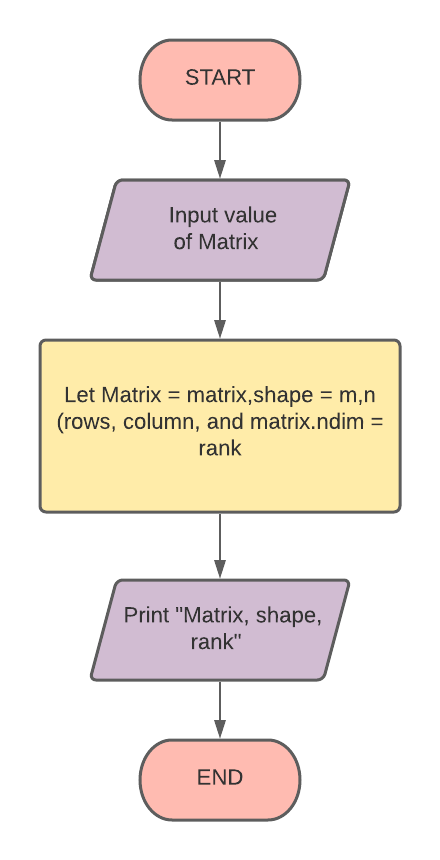

2. **Square or Non-Square**

In [12]:
def mat_desc(matrix):
  is_square = True if matrix.shape[0] == matrix.shape[1] else False
  print (f'Matrix:\n{matrix}\n\nShape:\t{matrix.shape}\nRank:\t{matrix.ndim}\nIs Square: {is_square}\n')

In [14]:
A = np.array([
    [4, 2, 4, 1],
    [5, 7, 3, 4],
    [5, 4, 2, 9],
    [4, 2, 6, 5],
    [2, 6, 3, 0]
])
mat_desc(A)

Matrix:
[[4 2 4 1]
 [5 7 3 4]
 [5 4 2 9]
 [4 2 6 5]
 [2 6 3 0]]

Shape:	(5, 4)
Rank:	2
Is Square: False



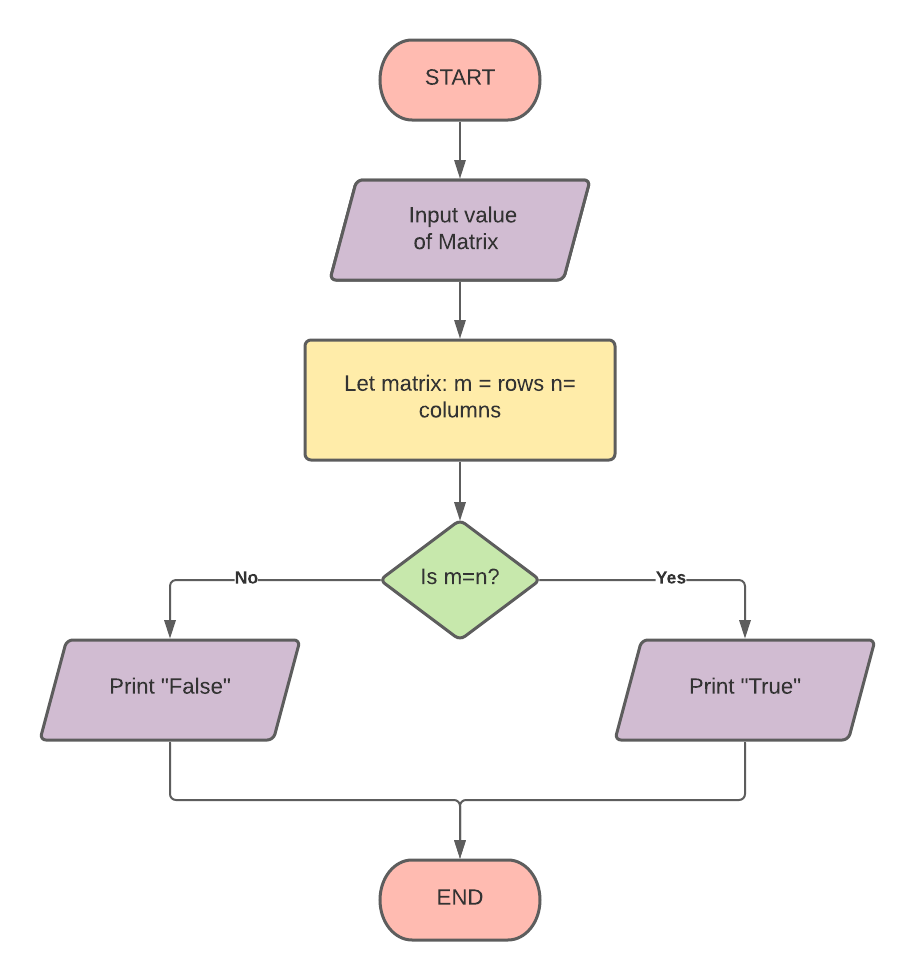

3. **Empty or Not Empty**

In [16]:
def mat_desc(matrix):
    if matrix.size > 0:
        is_square = True if matrix.shape[0] == matrix.shape[1] else False 
        print(f'Matrix:\n{matrix}\n\nShape:\t{matrix.shape}\nRank:\t{matrix.ndim}\nIs Square: {is_square}\n')
    else:
        print('Matrix is Null')

In [17]:
Y = np.array([
    []
])
mat_desc(Y)

Matrix is Null


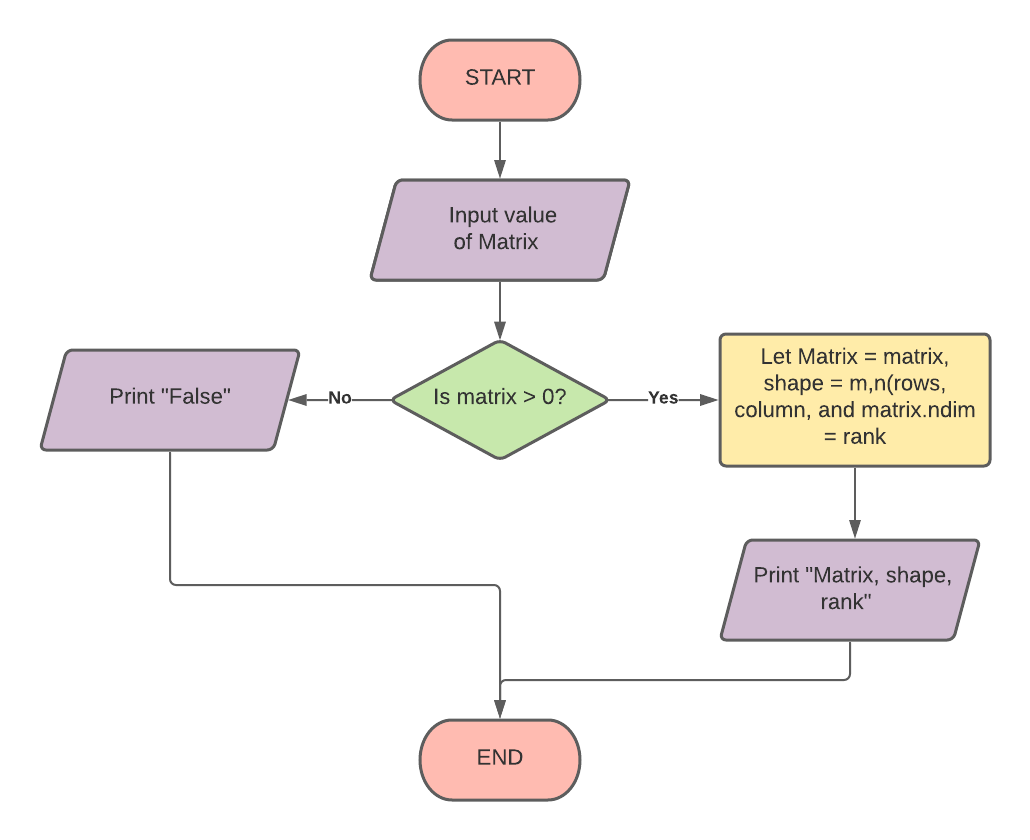

4. **Identity, Zeros or Ones**

In [19]:
zero_mat_row = np.zeros((5,8))
zero_mat_sqr = np.zeros((7,7))
zero_mat_rct = np.zeros((5,4))

print(f'Zero Row Matrix: \n{zero_mat_row}')
print(f'Zero Square Matrix: \n{zero_mat_sqr}')
print(f'Zero Rectangular Matrix: \n{zero_mat_rct}')

Zero Row Matrix: 
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
Zero Square Matrix: 
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
Zero Rectangular Matrix: 
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


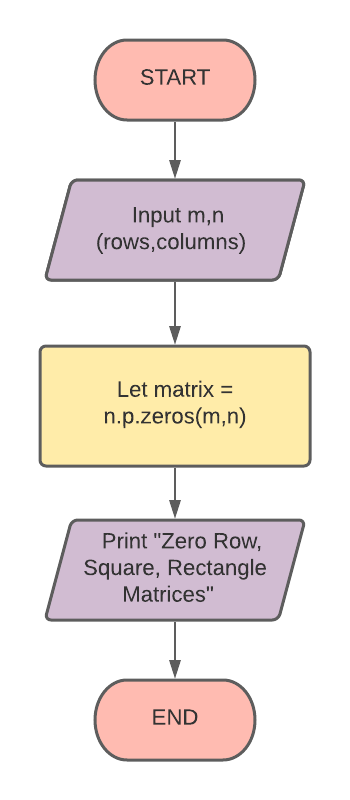

In [20]:
ones_mat_row = np.ones((6,7))
ones_mat_sqr = np.ones((4,5))
ones_mat_rct = np.ones((7,5))

print(f'Ones Row Matrix: \n{ones_mat_row}')
print(f'Ones Square Matrix: \n{ones_mat_sqr}')
print(f'Ones Rectangular Matrix: \n{ones_mat_rct}')

Ones Row Matrix: 
[[1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]]
Ones Square Matrix: 
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
Ones Rectangular Matrix: 
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


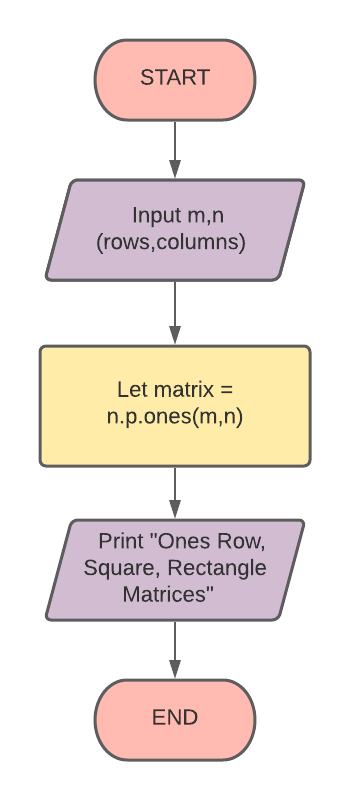

In [24]:
np.identity(8)

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

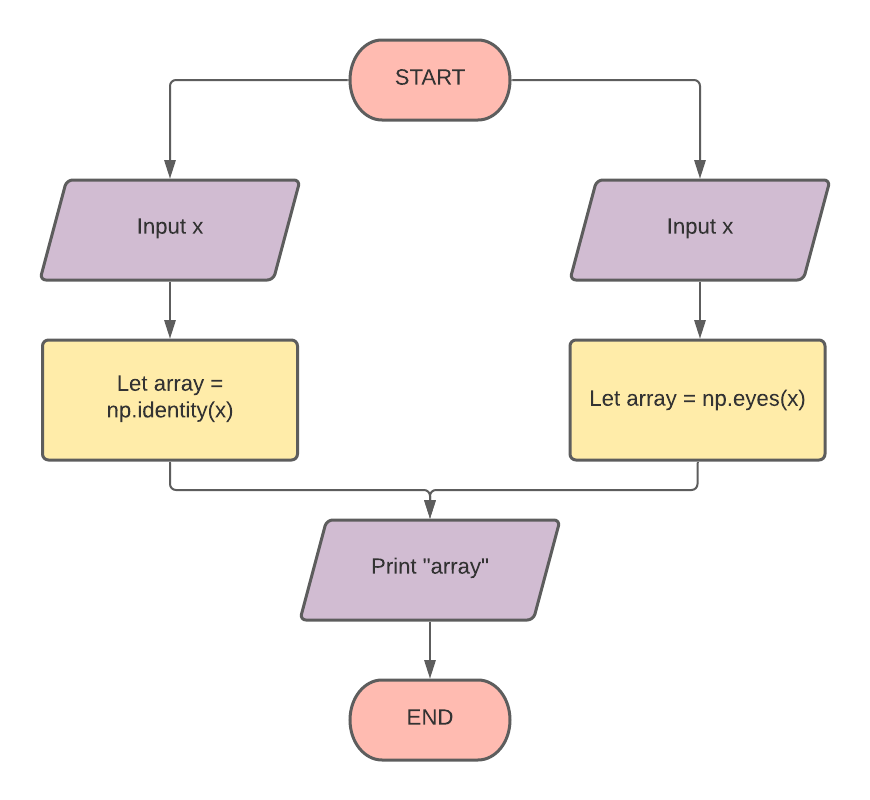

####**Task 2**

Create a function named mat_operations() that takes in two matrices a input parameters it should:

1. Determines if the matrices are viable for operation and returns your own error message if they are not viable.
2. Returns the sum of the matrices.
3. Returns the difference of the matrices.
4. Returns the element-wise multiplication of the matrices.
5. Returns the element-wise division of the matrices.

Use 5 sample matrices in which their shapes are not lower than $(3,3)$. In your methodology, create a flowchart discuss the functions and methods you have done. Present your results in the results section showing the description of each matrix you have declared.

In [26]:
def mat_operations(matrix):
    print(f'Matrix:\n{matrix}\n\nShape:\t{matrix.shape}\nRank:\t{matrix.ndim}\n')

1. **Sum of Matrices (Addition)**

In [50]:
M = np.array([
    [4,5,6],
    [3,2,3],
    [1,0,8],
    [1,2,3],
    [8,3,5]
])
A = np.array([
    [12,13,13],
    [4,6,1],
    [10,11,6],
    [7,3,6],
    [1,3,5]
])
Y = np.array([
    [14,1,3],
    [4,2,7],
    [0,1,9],
    [6,4,3],
    [8,5,9]
])

In [39]:
M+Y

array([[18,  6,  9],
       [ 7,  4, 10],
       [ 1,  1, 17],
       [ 7,  6,  6],
       [16,  8, 14]])

In [40]:
M+A

array([[16, 18, 19],
       [ 7,  8,  4],
       [11, 11, 14],
       [ 8,  5,  9],
       [ 9,  6, 10]])

In [41]:
A+Y

array([[26, 14, 16],
       [ 8,  8,  8],
       [10, 12, 15],
       [13,  7,  9],
       [ 9,  8, 14]])

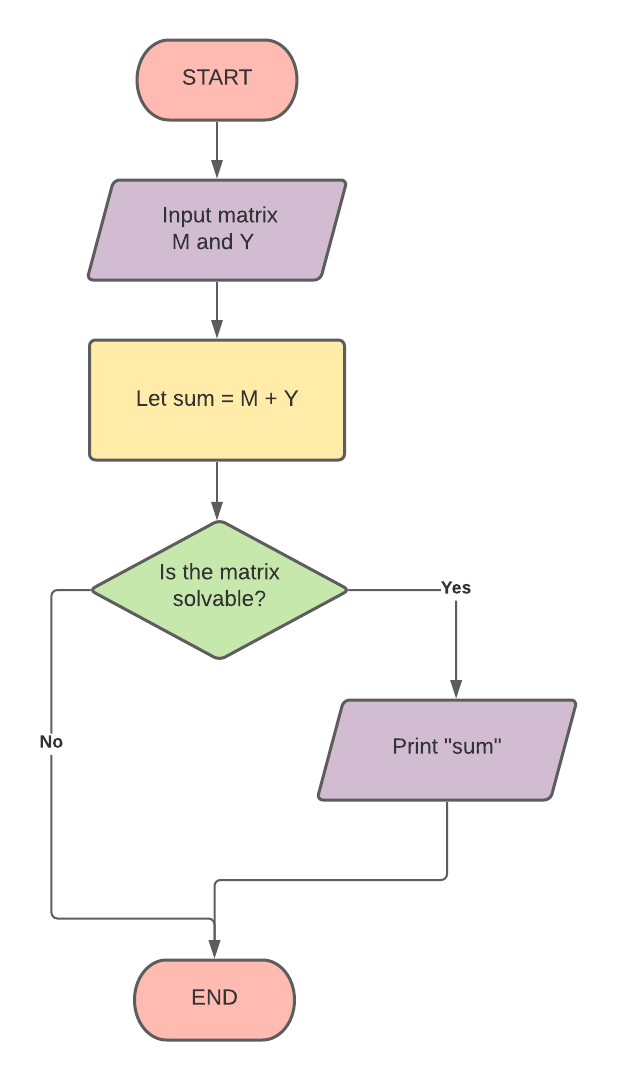

2. **Differences of Matrices (Subtraction)**

In [32]:
M-A

array([[ -8,  -8,  -7],
       [ -1,  -4,   2],
       [ -9, -11,   2],
       [ -6,  -1,  -3],
       [  7,   0,   0]])

In [33]:
M-5

array([[-1,  0,  1],
       [-2, -3, -2],
       [-4, -5,  3],
       [-4, -3, -2],
       [ 3, -2,  0]])

In [34]:
A-8

array([[ 4,  5,  5],
       [-4, -2, -7],
       [ 2,  3, -2],
       [-1, -5, -2],
       [-7, -5, -3]])

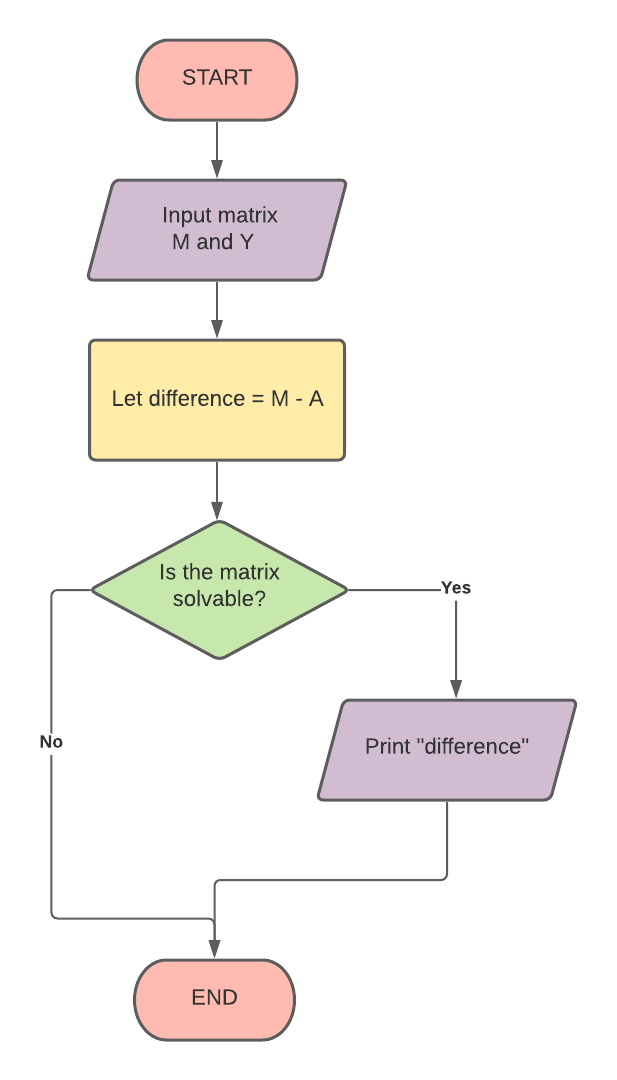

3. **Element-wise (Multiplication)**

In [43]:
A*Y
np.multiply(A,Y)

array([[168,  13,  39],
       [ 16,  12,   7],
       [  0,  11,  54],
       [ 42,  12,  18],
       [  8,  15,  45]])

In [44]:
2*M

array([[ 8, 10, 12],
       [ 6,  4,  6],
       [ 2,  0, 16],
       [ 2,  4,  6],
       [16,  6, 10]])

In [45]:
5*Y

array([[70,  5, 15],
       [20, 10, 35],
       [ 0,  5, 45],
       [30, 20, 15],
       [40, 25, 45]])

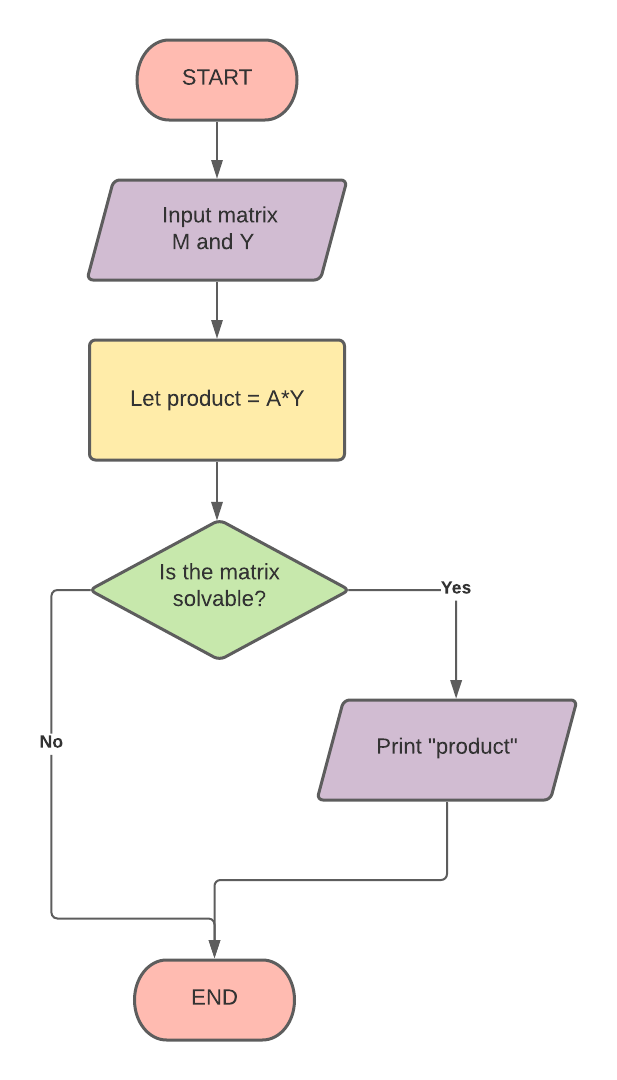

4. **Element-wise (Division)**

In [46]:
M/Y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


array([[0.28571429, 5.        , 2.        ],
       [0.75      , 1.        , 0.42857143],
       [       inf, 0.        , 0.88888889],
       [0.16666667, 0.5       , 1.        ],
       [1.        , 0.6       , 0.55555556]])

In [47]:
Y/A

array([[1.16666667, 0.07692308, 0.23076923],
       [1.        , 0.33333333, 7.        ],
       [0.        , 0.09090909, 1.5       ],
       [0.85714286, 1.33333333, 0.5       ],
       [8.        , 1.66666667, 1.8       ]])

In [48]:
A/3

array([[4.        , 4.33333333, 4.33333333],
       [1.33333333, 2.        , 0.33333333],
       [3.33333333, 3.66666667, 2.        ],
       [2.33333333, 1.        , 2.        ],
       [0.33333333, 1.        , 1.66666667]])

In [49]:
7/M

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


array([[1.75      , 1.4       , 1.16666667],
       [2.33333333, 3.5       , 2.33333333],
       [7.        ,        inf, 0.875     ],
       [7.        , 3.5       , 2.33333333],
       [0.875     , 2.33333333, 1.4       ]])

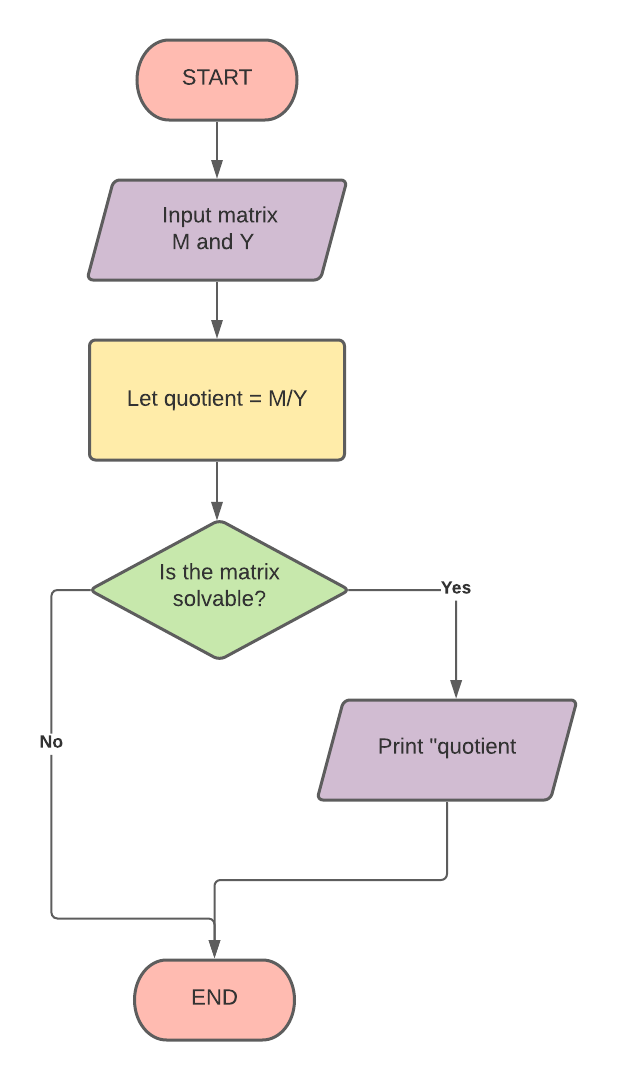

###**Conclusion**

Having a basic knowledge about matrix is probably an advantage for us students because we already know the meaning of whatever codes that we are inputting in the Colab. We are able to somehow distinguish what part went wrong and what part run smoothly. That’s why I think that listening attentively while in the class would be a big help in terms of computer programming. I learned that there are specific code that we have to use in each command. One single mistake could really destroy the outcome of all program. Overall, matrix operations do help in solving problems in technology in terms of security. There are specific code that helps in encoding and decoding data. It is also use to study the trends in business, plotting graphs and statistics, animations, and other physics related technologies. Without matrix, certain technology would not function precisely and without high accuracy. 
